# Predicting Default in Online Personal Loans

In [1]:
import os 

%matplotlib inline
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

## Data Preprocessing

In [2]:
# import datasets
dta = pd.read_csv("..\\lending_club\\loan.csv")

print(dta.shape)
print(dta.info())
print(dta.describe())
dta.head()

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.31513

C:\Users\Danie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
dta.describe(exclude = np.number)
print(dta['member_id'].nunique())
dta['member_id'].nunique() == dta.shape[0] # assert member_id is primary key

39717


True

## Missing Values

In [4]:
import missingno as msno

<AxesSubplot:>

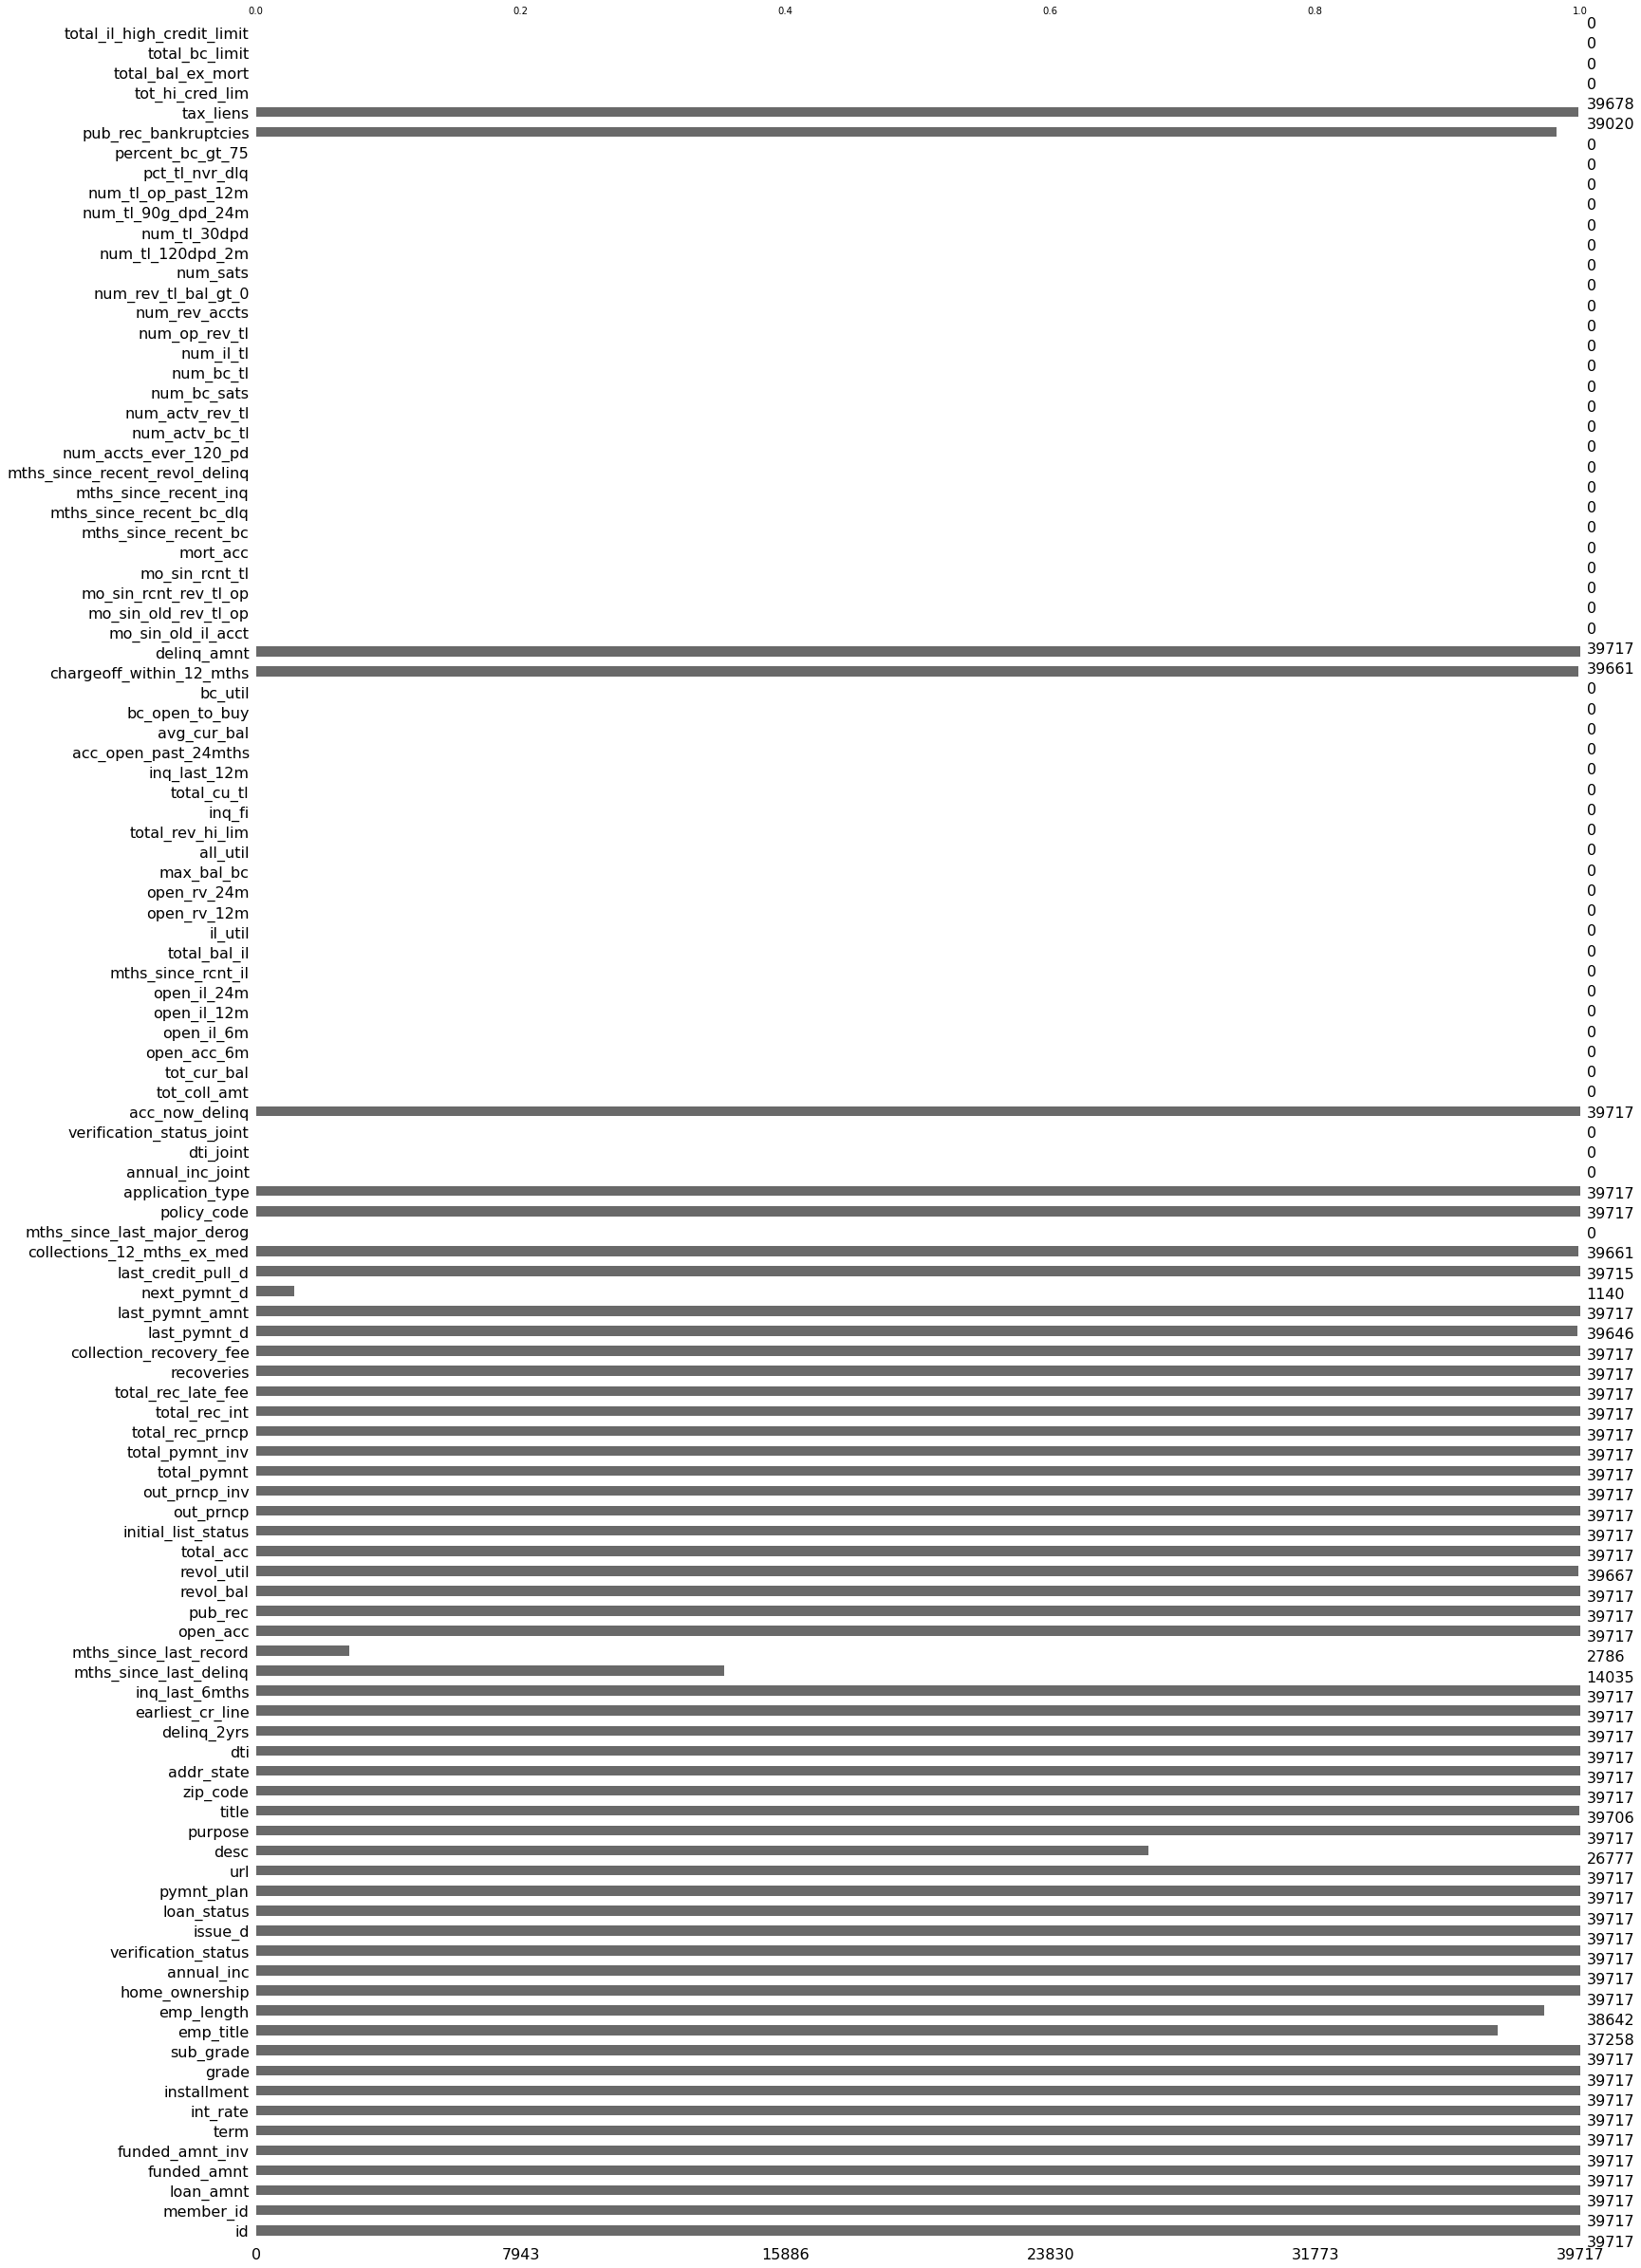

In [5]:
msno.bar(dta)

In [6]:
dta.isna().head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True


In [7]:
# drop columns with all missing values 
dta.dropna(axis = 1, how='all', inplace = True)

missing = []

for i, j in enumerate(dta.isna().sum() / dta.shape[0]):
    if j == 0:
        continue
        
    missing.append((dta.columns[i], j))

sorted(missing, key = lambda x: x[1], reverse = True)

[('next_pymnt_d', 0.971296925749679),
 ('mths_since_last_record', 0.9298537150338646),
 ('mths_since_last_delinq', 0.6466248709620566),
 ('desc', 0.3258050708764509),
 ('emp_title', 0.06191303472064859),
 ('emp_length', 0.027066495455346576),
 ('pub_rec_bankruptcies', 0.017549160309187503),
 ('last_pymnt_d', 0.001787647606818239),
 ('collections_12_mths_ex_med', 0.0014099755772087519),
 ('chargeoff_within_12_mths', 0.0014099755772087519),
 ('revol_util', 0.0012589067653649571),
 ('tax_liens', 0.0009819472769846665),
 ('title', 0.00027695948838029054),
 ('last_credit_pull_d', 5.0356270614598286e-05)]

## Handling missing values

Three ways (to my knowledge) to handle missing data:

1) Delete Rows (listwise). <br>
2) Imputation. Not great for financial data, as missing fields could be due to data from other sources (e.g. other credit bureaus). Instead, better to use a judgment call for certain financial fields. E.g. if its about bankruptcy, fill NAs with 0. <br>
3) If categorical, make null values its own class

In [8]:
dta['next_pymnt_d'] # won't be a feature, thus no need to handle

dta['mths_since_last_record'].describe()
# dta['mths_since_last_record'].isnull().sum()
# this is months since last public record, thus the vast majority of missing means these people
# do not have a public record. So this makes sense.
dta['has_pub_rec'] = dta['mths_since_last_record'].notnull().astype(int)
dta['has_delin'] = dta['mths_since_last_delinq'].notnull().astype(int)
dta['has_desc'] = dta['desc'].notnull().astype(int)

# employer info. leave as is
dta['emp_title']
dta['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [9]:
# Bankruptcies
print(dta['pub_rec_bankruptcies'].value_counts())
print(dta['pub_rec_bankruptcies'].isna().sum())
dta['pub_rec_bankruptcies'].fillna(0, inplace = True)

# Number of Collection accounts
print(dta['collections_12_mths_ex_med'].value_counts())
print(dta['collections_12_mths_ex_med'].isna().sum())
dta['collections_12_mths_ex_med'].fillna(0, inplace = True)

# Charge-offs
dta['chargeoff_within_12_mths'].fillna(0, inplace = True)

# Revolving Utilization
dta['revol_util'] = dta['revol_util'].str.rstrip('%').astype('float') / 100
print(dta['revol_util'].min())
print(dta['revol_util'].max())

print(dta['revol_util'].isna().sum())
# revolving balance = 0 all but 1
dta[dta['revol_util'].isna() == True]['revol_bal']
dta['revol_util'].fillna(0, inplace = True)

dta['int_rate'] = dta['int_rate'].str.rstrip('%').astype('float') / 100
dta['tax_liens'].fillna(0, inplace = True)

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64
697
0.0    39661
Name: collections_12_mths_ex_med, dtype: int64
56
0.0
0.9990000000000001
50


### Exploratory Data Analysis - Summary Stats

In [10]:
import sidetable

In [11]:
# dta.columns.to_list()
# dta.stb.freq(['sub_grade'])
# dta.stb.counts()
# dta.stb.freq(['grade'])

dta.groupby('grade')['grade'].count()

grade
A    10085
B    12020
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

### Exploratory Data Analysis - Preliminary Visualizations

``line`` - line plot (default) <br>
``bar`` - vertical bar plot <br>
``barh`` - horizontal var plot <br>
``hist`` - histogram <br>
``box`` - box plot <br>
``kde`` - Kernel Density Estimate <br>
``area`` - Area <br>
``pie`` - Pie <br>
``scatter`` - Scatter plot




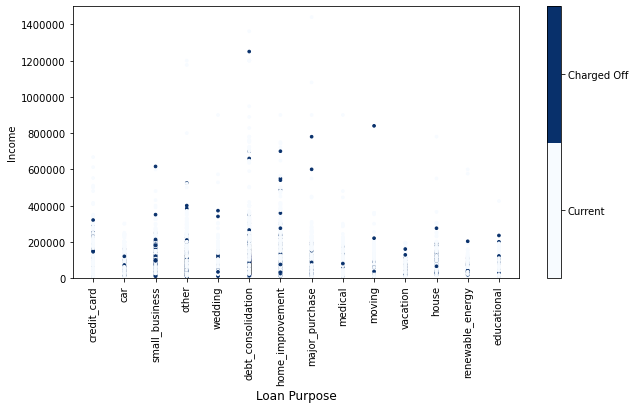

In [12]:
plt.rcParams
plt.rcParams['figure.figsize'] = 10, 5

# Purpose and income
# categorical color bar (helpful link): https://gist.github.com/jakevdp/8a992f606899ac24b711
# manual one-hot encoding
dta['target'] = np.where(dta['loan_status'].isin(['Charged Off']), 1, 0)

plt.ticklabel_format(style = 'plain')
plt.scatter(x = dta['purpose'], y= dta['annual_inc'], \
            c = dta['target'], cmap = plt.cm.get_cmap('Blues', 2), s = 7)

names = ['Current','Charged Off']
formatter = plt.FuncFormatter(lambda val, loc: names[val])

plt.colorbar(ticks=[0, 1], format = formatter)
plt.clim(-0.5, 1.5)
plt.xticks(rotation = 'vertical')
plt.ylim(0,1.5e6)
plt.ylabel('Income')
plt.xlabel('Loan Purpose', size= 12)
plt.show()

14.00062377821221
13.201979759460295


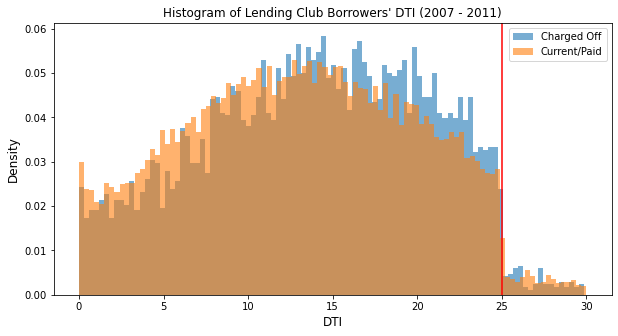

In [13]:
# Compare distributions of people who are able to pay back v.s. not able 
dta['loan_status'].unique()

print(dta[dta['loan_status'] == 'Charged Off']['dti'].mean())
print(dta[dta['loan_status'] != 'Charged Off']['dti'].mean())

plt.hist(dta[dta['loan_status'] == 'Charged Off']['dti'], \
         bins = 100, alpha = 0.6, density = True, label = 'Charged Off')
plt.hist(dta[dta['loan_status'] != 'Charged Off']['dti'], \
         bins = 100, alpha = 0.6, density = True, label = 'Current/Paid')

plt.axvline(x=25, color = 'red')
plt.legend()
plt.xlabel('DTI', size = 12)
plt.ylabel('Density', size = 12)
plt.title("Histogram of Lending Club Borrowers' DTI (2007 - 2011)")
plt.show()

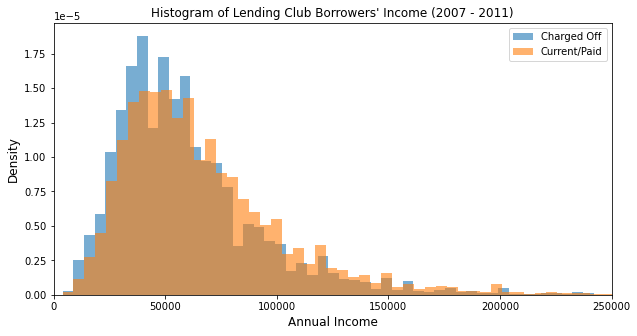

In [14]:
plt.hist(dta[(dta['loan_status'] == 'Charged Off') & (dta['annual_inc'] < 250000)]['annual_inc'], \
         bins = 50, alpha = 0.6, density = True, label = 'Charged Off')

plt.hist(dta[(dta['loan_status'] != 'Charged Off') & (dta['annual_inc'] < 250000)]['annual_inc'], \
         bins = 50, alpha = 0.6, density = True, label = 'Current/Paid')

plt.legend()

plt.xlabel('Annual Income', size = 12)
plt.ylabel('Density', size = 12)
plt.title("Histogram of Lending Club Borrowers' Income (2007 - 2011)")
plt.xlim(0,250000)

plt.show()

### Interactive Visualization

In [15]:
import ipywidgets as widgets

In [16]:
def plot_bar(x, y, hue):
    g = sns.barplot(data=dta, x=x, y=y, hue=hue, ci='sd')
    plt.setp(g.get_xticklabels(), rotation='vertical', size = 10)


numeric_columns = dta.select_dtypes(include='number').columns
str_columns = dta.select_dtypes(exclude='number').columns

widgets.interact(plot_bar,
                 x = str_columns,
                 y = numeric_columns,
                 hue = str_columns)

# It seems those that are getting a personal loan for education are 
# writing the most descriptions, and also charging off the most.

interactive(children=(Dropdown(description='x', options=('term', 'grade', 'sub_grade', 'emp_title', 'emp_lengt…

<function __main__.plot_bar(x, y, hue)>

## Feature Engineering

#### Feature Engineering tools

In [17]:
# Handling Class Imbalance
from sklearn.utils import resample

# Feature Engineering
from sklearn.tree import DecisionTreeClassifier

### Feature Selection
<br>
<br>
<b>Flavor from Theory</b>: What happens during a loan application? Fundamentally, the intermediary is selling the ability to shift capital. The borrower wants to maximize this flexibility regardless of their "type" (creditworthy vs uncreditworthy) which only they observe. The intermediary's goal is to accurately determine the borrower's type (<b><i>Stiglitz and Weiss 1981</i></b>). In a simple framework,

1) The borrower only furnishes additional information if it acts as a positive signal of creditworthiness. <br>
2) If the intermediary's screening technology is imperfect, uncreditworthy borrowers will lie to try to pool themselves with credit worthy borrowers. <br>

The combination of the two points above suggest information in which the applicant can choose what to signal (e.g. <b> soft information </b>), such as a description for their loan purpose, is likely to be very informative to detect "uncreditworthy" behavior such as deception. I explore this more in the second section.

An important point to keep in mind is that this dataset is over a set of individuals whom successfully applied for a loan. Self-selection is likely at play for successful defaulters versus those that would have default had their loan been approved, and it would be prudent to make claims about how well this model would generalize in production. 

<br>
<b>Business and Engineering Perspective</b>: What tools can we use to determine feature importance?

1) Drop columns that won't help, such as example IDs (common sense). 

2) Then, there are a few tools to help with dimension reduction, including the following: 

- Feature Importance from Decision tree classifiers <br>
- Subset selection <br>
- PCA <br>

However, there are <100 columns and >39,000 observations, so there isn't a dimensionality issue. I elect to keep all



### Filter features by low variance first

In [18]:
dta.var().sort_values()

acc_now_delinq                0.000000e+00
chargeoff_within_12_mths      0.000000e+00
tax_liens                     0.000000e+00
collections_12_mths_ex_med    0.000000e+00
delinq_amnt                   0.000000e+00
policy_code                   0.000000e+00
int_rate                      1.387432e-03
pub_rec_bankruptcies          4.104791e-02
pub_rec                       5.626382e-02
has_pub_rec                   6.522743e-02
revol_util                    8.047258e-02
target                        1.216080e-01
has_desc                      2.196617e-01
has_delin                     2.285069e-01
delinq_2yrs                   2.418786e-01
inq_last_6mths                1.145369e+00
open_acc                      1.936249e+01
dti                           4.460361e+01
total_rec_late_fee            5.314380e+01
total_acc                     1.299990e+02
mths_since_last_delinq        4.848830e+02
mths_since_last_record        1.920414e+03
collection_recovery_fee       2.210324e+04
installment

In [19]:
# Some of the feature selection has 
# already been done in the missing data cleaning part
# Leave 'sub_grade' out, since that is Lending Club's proprietary scoring method

# only keep ID AND target for merging later on, but do not use as a feature

subset = ['id',
            'target',
            'loan_amnt',
            'term',            
            'emp_length',
            'home_ownership',
            'annual_inc',
            'dti',
            'has_desc',
            'has_delin',
            'inq_last_6mths',            
            'open_acc',            
            'revol_bal',
            'revol_util',
            'total_acc',                                    
            'addr_state',
            'purpose']

<function matplotlib.pyplot.show(close=None, block=None)>

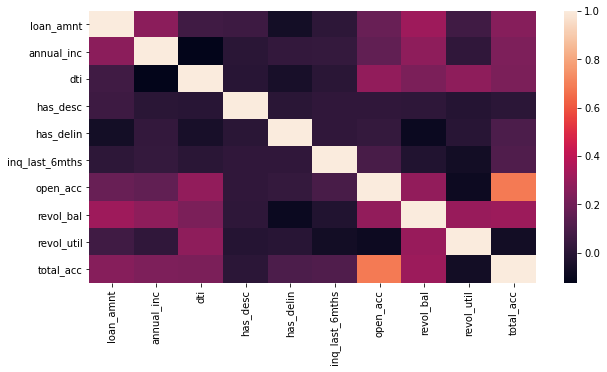

In [20]:
# feature correlation - drop (one of) features with high multicollinearity 
fig, ax = plt.subplots()
sns.heatmap(dta[subset].drop('id',1).drop('target',1).corr(), ax = ax)
plt.show

It seems there is high multicollinearity between open accounts and total accounts, thus I remove open accounts

In [21]:
subset.remove('open_acc')

In [22]:
dta[subset].dtypes
my_features = dta[subset].drop('id',1).drop('target',1)

# encode the categorical vars
to_encode = ['home_ownership', 'emp_length', 'term', 'addr_state', 'purpose']
my_features = pd.get_dummies(my_features, columns = to_encode)

In [23]:
# make sure there are no empty spaces in column headers
my_features.columns = my_features.columns.str.replace(" ", "_")
# my_features.columns.to_list()

In [24]:
# absCorrWithTarget = []

# for var in my_features.columns.to_list():        
#     my_corr = abs(upsampled_dta['target'].corr(my_features[var]))    
#     absCorrWithTarget.append((var, my_corr))

# sorted(absCorrWithTarget, key = lambda x: x[1], reverse = True)

# some states have very low correlation with target such as Michigan. However,
# I'd have to get rid of all state dummies if I wish to get rid of the MI feature
# So i'll keep it there.

### Outlier Detection

Finally, look for outliers that may be implausible

In [25]:
to_check = ['loan_amnt',
'annual_inc',
'dti',
'inq_last_6mths',
'revol_bal',
'revol_util',
'total_acc']

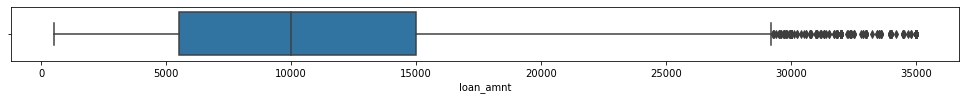

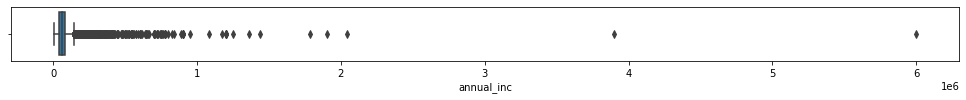

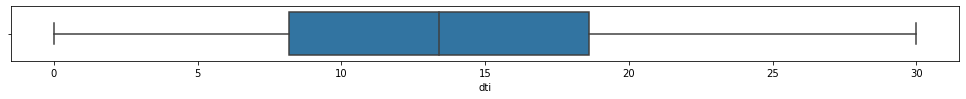

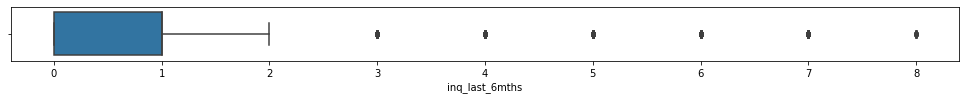

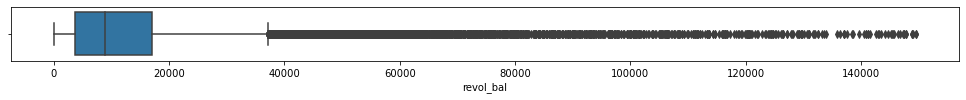

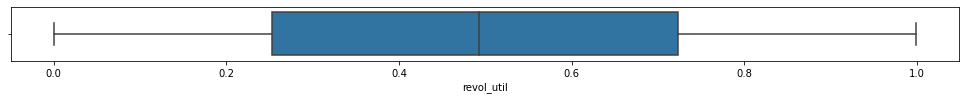

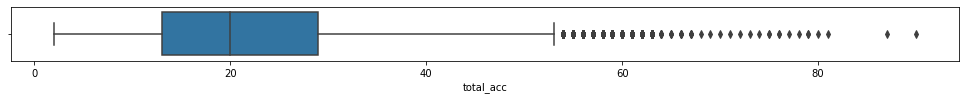

In [26]:
for column in to_check:
    plt.figure(figsize = (17,1))
    sns.boxplot(data = my_features, x = column)

## Modelling

In this project, I will use the following models to predict loan default/charge-off:

1) <b>Logistic Regression</b> <br>
2) <b>Random Forest (RF)</b> <br>
3) <b>Extreme Gradient Boosting (XGBoost)</b> <br>

It will be interesting to compare the performance across these models. Some questions to keep in mind include: <br>

- How much interpretability of our explanatory variables should we sacrifice for more sophisticated prediction machines?  <br>
- As models become more sophisticated, how can you ensure it is compliant with fair lending laws? ``(Bartlett, Stanton, Morse and Wallace 2019)``

- How does RF compare against XGBoost in loan prediction? Will XGBoost overfit to the noise in the training set? 


In [27]:
# tools for sample splitting
from sklearn.model_selection import train_test_split

# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Performance Metrics
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV # cross val
from sklearn.metrics import plot_confusion_matrix # draw confusion matrix

### Class Rebalancing: Training and Validation or only Training?

Argument for upsampling both the training and validation set:

- The dataset covers originated loans (borrower pool), while this model will be deployed on a larger applicant pool. Before origination, there are bound to be a higher proportion of applications that look like potential defaulters and are denied.

Argument against upsampling: 

- We are not sure what the true proportion of non-paying types are in the applicant pool, and could also make False Positive errors. 

Given that there is definitely a higher proportion of "non-paying" types in the applicant pool, I elect to upsample both the training and validation set

In [28]:
from sklearn.utils import shuffle

labels = dta[subset]['target']
dta2 = pd.concat([my_features, labels], axis = 1)
currents = dta2[dta2['target'] == 0]
defaults = dta2[dta2['target'] == 1]

upsampled_dta = resample(defaults, replace = True, n_samples = currents.shape[0], random_state = 99999)
upsampled_dta = pd.concat([currents, upsampled_dta])
upsampled_dta = shuffle(upsampled_dta)

X = upsampled_dta.drop('target',1)
y = upsampled_dta['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 11)

### Logistic Regression

I use lbfgs since its a search algorithm with $O(n^2)$ complexity. This is less computationally expensive than the Newton loss method which takes $O(n^3)$ time. In my experience, it also performs better when there is class imbalance (since it is very likely some features have no variation in the target), although I have already upsampled the data. 

According to sklearns documentation, L2 regularization is already applied by default


In [29]:
log_reg = LogisticRegression(random_state = 999, solver = 'lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=999)

## Random Forest

In [30]:
rf = RandomForestClassifier(random_state = 123, max_depth = 20, n_estimators = 40)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=40, random_state=123)

## XGBoost 

In [31]:
X_train.columns = X_train.columns.str.replace(",", "")
X_train.columns = X_train.columns.str.replace(">", "")
X_train.columns = X_train.columns.str.replace("<", "")

X_test.columns = X_train.columns.str.replace(",", "")
X_test.columns = X_train.columns.str.replace(">", "")
X_test.columns = X_train.columns.str.replace("<", "")

In [32]:
xtreme = xgb.XGBClassifier(objective = 'binary:logistic', 
                            eval_metric = "logloss",
                            seed = 42, 
                            use_label_encoder = False)

xtreme.fit(X_train, 
           y_train, 
           verbose = True, 
           early_stopping_rounds = 100, 
           eval_metric= 'aucpr', 
           eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.64784
[1]	validation_0-aucpr:0.67079
[2]	validation_0-aucpr:0.67900
[3]	validation_0-aucpr:0.68244
[4]	validation_0-aucpr:0.68855
[5]	validation_0-aucpr:0.69442
[6]	validation_0-aucpr:0.69741
[7]	validation_0-aucpr:0.70231
[8]	validation_0-aucpr:0.70644
[9]	validation_0-aucpr:0.71216
[10]	validation_0-aucpr:0.71511
[11]	validation_0-aucpr:0.71942
[12]	validation_0-aucpr:0.72244
[13]	validation_0-aucpr:0.72417
[14]	validation_0-aucpr:0.72613
[15]	validation_0-aucpr:0.72798
[16]	validation_0-aucpr:0.73150
[17]	validation_0-aucpr:0.73254
[18]	validation_0-aucpr:0.73489
[19]	validation_0-aucpr:0.73776
[20]	validation_0-aucpr:0.74047
[21]	validation_0-aucpr:0.74251
[22]	validation_0-aucpr:0.74393
[23]	validation_0-aucpr:0.74570
[24]	validation_0-aucpr:0.74713
[25]	validation_0-aucpr:0.74848
[26]	validation_0-aucpr:0.75000
[27]	validation_0-aucpr:0.75217
[28]	validation_0-aucpr:0.75276
[29]	validation_0-aucpr:0.75569
[30]	validation_0-aucpr:0.75854
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=32,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

### Predict testing data points

Test over the original dataset rather than the upsampled one

In [33]:
logit_y_pred = log_reg.predict(X_test)
rf_y_pred = rf.predict(X_test)
xgb_y_pred = xtreme.predict(X_test)

logit_probs = log_reg.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)
xgb_probs = xtreme.predict_proba(X_test)

## Evaluation: Confusion Matrix and AUC

In [34]:
def plot_conf_mtx(cm, preds, classes = None, title = 'Confusion Matrix'):
    
    """ plot confusion matrix"""    
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels = classes, yticklabels = classes, vmin = 0, vmax = 1., annot = True, annot_kws={'size':50})        
    else:
        sns.heatmap(cm, vmin = 0., vmax = 1.)
   
    print(confusion_matrix(y_test, preds))

    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')  
    plt.savefig(title + '.jpg')
    plt.show()
        
    precision = confusion_matrix(y_test, preds)[1][1]/(confusion_matrix(y_test, preds)[0][1] + confusion_matrix(y_test, preds)[1][1])
    recall  = confusion_matrix(y_test, preds)[1][1]/(confusion_matrix(y_test, preds)[1][0] + confusion_matrix(y_test, preds)[1][1])

    print("Precision: ", precision) # out of all the data points flagged as positive, what proportion are indeed positive?
    print("Recall: ", recall) # out of all the data points that are actually positive, what proportion did you flag?
    print("AUC: ", roc_auc_score(y_test, preds)) # Trade-off b/t false positive and true positive rate

[[3886 3013]
 [3065 3672]]


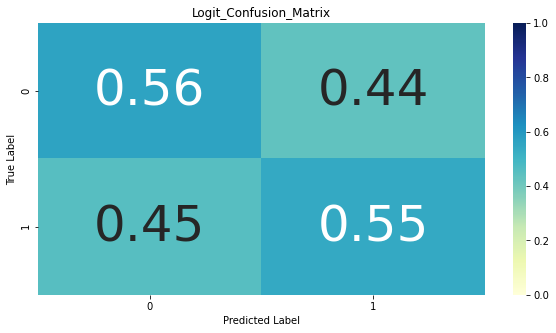

Precision:  0.5492894540014959
Recall:  0.545049725397061
AUC:  0.5541598822665839
[[5944  955]
 [ 242 6495]]


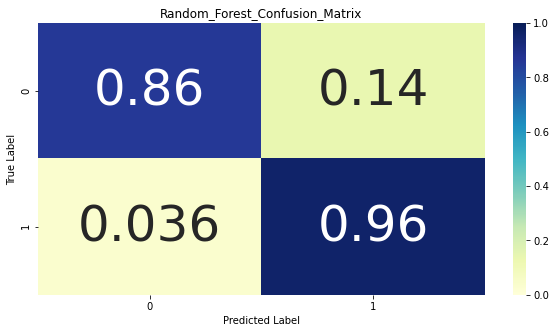

Precision:  0.8718120805369127
Recall:  0.9640789668992134
AUC:  0.9128265540395474
[[5018 1881]
 [1192 5545]]


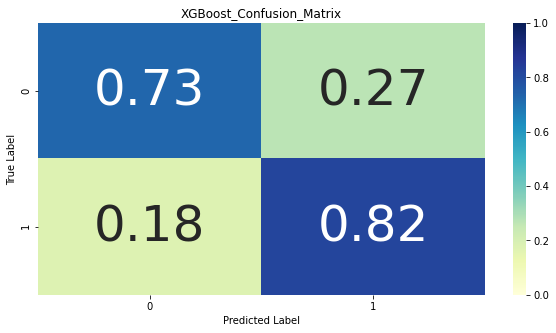

Precision:  0.7467007810395906
Recall:  0.8230666468754638
AUC:  0.7752092184949866


In [35]:
logit_cm = confusion_matrix(y_test, logit_y_pred)
logit_cm_norm = logit_cm / logit_cm.sum(axis = 1).reshape(-1,1)
plot_conf_mtx(logit_cm_norm, logit_y_pred, classes = log_reg.classes_, title = "Logit_Confusion_Matrix")

rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm_norm = rf_cm / rf_cm.sum(axis = 1).reshape(-1,1)
plot_conf_mtx(rf_cm_norm, rf_y_pred, classes = rf.classes_, title = "Random_Forest_Confusion_Matrix")

xgb_cm = confusion_matrix(y_test, xgb_y_pred)
xgb_cm_norm = xgb_cm / xgb_cm.sum(axis = 1).reshape(-1,1)
plot_conf_mtx(xgb_cm_norm, xgb_y_pred, classes = xtreme.classes_, title = "XGBoost_Confusion_Matrix")

## ROC Curve

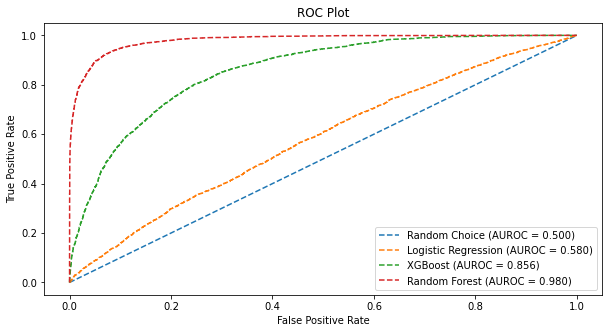

In [36]:
# Create a diagonal line for random prediction
random_probs = [0 for _ in range(len(y_test))]

random_auc = roc_auc_score(y_test, random_probs)
logit_auc = roc_auc_score(y_test, logit_probs[:,1])
rf_auc = roc_auc_score(y_test, rf_probs[:,1])
xgb_auc = roc_auc_score(y_test, xgb_probs[:,1])

# retain just the positive probs
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs[:,1])
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs[:,1])

plt.plot(random_fpr, random_tpr, linestyle = '--', label='Random Choice (AUROC = %0.3f)' % (random_auc))
plt.plot(logit_fpr, logit_tpr, linestyle = '--', label='Logistic Regression (AUROC = %0.3f)' % (logit_auc))
plt.plot(xgb_fpr, xgb_tpr, linestyle = '--', label='XGBoost (AUROC = %0.3f)' % (xgb_auc))
plt.plot(rf_fpr, rf_tpr, linestyle = '--', label='Random Forest (AUROC = %0.3f)' % (rf_auc))

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('ROC_curve.jpg')
plt.show()


Interestingly, Random Forest performs better than XGBoost. The likely reason is twofold: There are not enough defaulters (5,627 out of 39,717) and resampling marginally improves prediction for XGBoost, since XGBoost overfits to the noise. Thus, if there is a way to gather more systematic information about defaulters, this may improve the performance of XGBoost relative to Random Forests. 

# Engineering Additional Features: Text

#### Can we use patterns in the description provided in the online application to predict default?

Hard information such as FICO scores and DTI ratios provide easily quantifiable information, also known as <b>hard information</b>, to assess the creditworthiness of applicants. Some applicants with thin-files or barely passing underwriting criteria are difficult to screen. Loan officers play a critical role by evaluating the <b>soft information</b> of these hard-to-screen applicants, and use their best judgment to make a loan decision (Agarwal and Hauswald 2010). 

Can a machine do a loan officers job? In this section, I explore whether text information submitted by the applicant can systematically improve the prediction of default. Writing style and selection of words can be indicative of traits correlated with repayment behavior. I follow ``Netzer, Lemaire and Herzenstein (2019)`` and implement the following textual analysis method:

Select the most informative bigrams as features by ranking the following expression:

$ \large{
\frac{P(bigram|defaulted)}{P(bigram|repaid)}
}
$

In [37]:
import nltk
import re
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
stemmer = PorterStemmer()

In [39]:
upsampled_dta = upsampled_dta.merge(dta['desc'], left_index=True, right_index=True, how='left')
upsampled_dta.reset_index(inplace=True)
raw_text = upsampled_dta['desc']
clean_text = raw_text.fillna('')

## Clean string

1) Trim external and internal spaces <br>
2) make everything lower case <br>
2) Get rid of punctuations

In [40]:
# lowercase
clean_text = [x.lower() for x in list(clean_text)]

# Exclude some markdown characters 
clean_text = [x.replace("<br>", "") for x in clean_text]
clean_text = [x.replace("<br/>", "") for x in clean_text]

# Exclude "borrower added on {date} >"

def remove_log(my_str):
    return re.sub(r"borrower added on [0-9][0-9]\/[0-9][0-9]\/[0-9][0-9] > ", "", my_str)

clean_text = [remove_log(x) for x in clean_text]

#trim internal and external spaces
clean_text = [" ".join(x.split()) for x in list(clean_text)]

# Get rid of punctuation
puncs = string.punctuation
numbers = '0123456789'

def strip_puncs(x):
    return ''.join(char for char in x if char not in (puncs or numbers))
clean_text = [strip_puncs(x) for x in clean_text]

In [41]:
# Lemmatize and remove stop words
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

new_list = []

for text in clean_text:    
    words = word_tokenize(text)
    
    new_text = []
    
    for word in words:
        if word not in stop_words:
            lem_word = lemmatizer.lemmatize(word)
            new_text.append(lem_word)
        
    new_list.append(" ".join(new_text))

## Bigrams

Use naive bayes to see which ones discriminate between charge-offs and paid off loans the best. Bigram count as features

In [42]:
from nltk.util import ngrams

In [43]:
paid_dict = {}
chgoff_dict = {}
bag_bigrams = list()

for index, desc in enumerate(new_list):
    
    token = nltk.word_tokenize(desc)
    bigrams = list(ngrams(token, 2))
    
    bag_bigrams += bigrams
    
    default = (upsampled_dta['target'][index] == 1).astype(int)
    paid = (upsampled_dta['target'][index] == 0).astype(int)    
    
    for bigram in bigrams:
        if bigram in paid_dict.keys():    
            paid_dict[bigram] += paid 
            chgoff_dict[bigram] += default
        else:                        
            paid_dict[bigram] = paid
            chgoff_dict[bigram] = default    

In [44]:
# convert to a set
bag_bigrams = set(bag_bigrams)

# now calculate the proportion
prop1_dict = {}
prop2_dict = {}

for bigram in bag_bigrams:
    if (paid_dict[bigram] >=1) and (chgoff_dict[bigram] >=1):        
        prop1_dict[bigram] = (chgoff_dict[bigram])/(paid_dict[bigram])    
        prop2_dict[bigram] = (paid_dict[bigram])/(chgoff_dict[bigram])            

In [45]:
high_default = sorted(prop1_dict.items(), key=lambda x:x[1], reverse = True)[0:26]
high_default_grams =  [lst[0] for lst in high_default]
high_default_counts =  [lst[1] for lst in high_default]

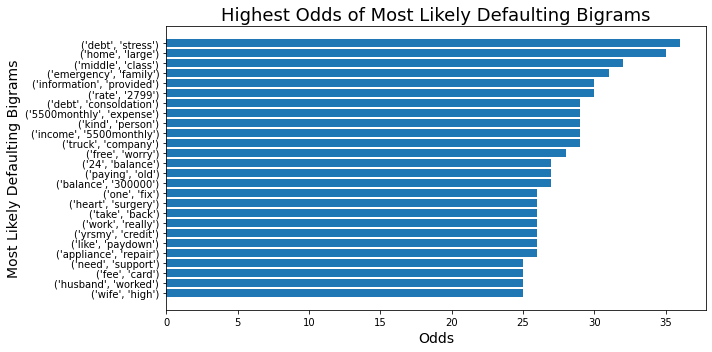

In [46]:
fig, ax = plt.subplots()

y_pos = np.arange(len(high_default_grams))
ax.barh(y_pos, high_default_counts, align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(high_default_grams)
ax.invert_yaxis()
ax.set_xlabel('Odds', size = 14)
ax.set_ylabel('Most Likely Defaulting Bigrams', size = 14)
ax.set_title('Highest Odds of Most Likely Defaulting Bigrams', size = 18)
plt.tight_layout()
fig.savefig('chgoff_bigrams.jpg')

In [47]:
low_default = sorted(prop2_dict.items(), key=lambda x:x[1], reverse= True)[0:25]
low_default_grams =  [lst[0] for lst in low_default]
low_default_counts =  [lst[1] for lst in low_default]

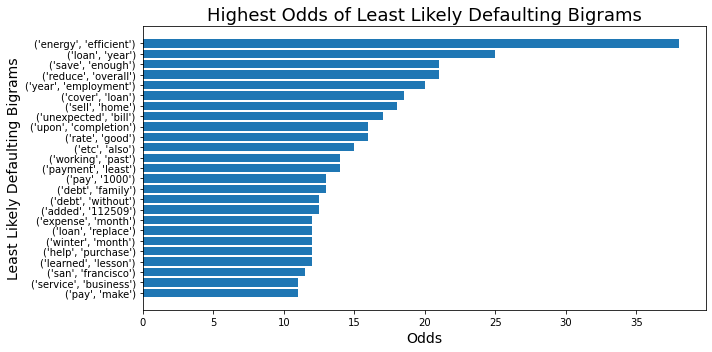

In [48]:
fig, ax = plt.subplots()

y_pos = np.arange(len(low_default_grams))
ax.barh(y_pos, low_default_counts, align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(low_default_grams)
ax.invert_yaxis()
ax.set_xlabel('Odds', size = 14)
ax.set_ylabel('Least Likely Defaulting Bigrams', size = 14)
ax.set_title('Highest Odds of Least Likely Defaulting Bigrams', size = 18)
plt.tight_layout()
fig.savefig('paid_bigrams.jpg')

It seems the bigrams associated with high odds of default mention two key things: 1) family and 2) uncertainty. For instance, words such as "<i><b>stress</b></i>", "<i><b>emergency</b></i>", "<i><b>surgery</b></i>", "<i><b>home</b></i>", "<i><b>family</b></i>", "<i><b>worry</b></i>" and "<i><b>wife</b></i>" are featured in the top 25 bigrams associated with high odds of charge-off. <br> <br> In contrast, the bigrams associated with low odds of defaulting use very specific terminology, with words such as "<i><b>efficient</b></i>", "<i><b>reduce</b></i>", "<i><b>save</b></i>", "<i><b>employment</b></i>", "<i><b>cover</b></i>", "<i><b>sell</b></i>", "<i><b>completion</b></i>" and "<i><b>working</b></i>". Additionally, the text analysis suggests some types of loans such as home improvements are more likely to repay back. The top bigram indicative of repaying behavior is <b><i>("energy", "efficient")</b></i>, suggesting the applicant is trying to remodel their home. Let's verify this below:
 <br> <br>

In [49]:
top_bigrams = {}

for key in chgoff_dict.keys():
    top_bigrams[key] = chgoff_dict[key] + paid_dict[key]    

top_bigrams = sorted(top_bigrams.items(), key=lambda x:x[1], reverse= True)[0:200]
#top_bigrams = [x[0] for x in low_default + high_default]

upsampled_dta['clean_desc'] = new_list

In [50]:
bigrams_list = []

for text in new_list:
    bigrams = list(ngrams(nltk.word_tokenize(text), 2))
    bigrams_list.append(bigrams)
    

In [51]:
upsampled_dta['bigrams'] = bigrams_list

count = 0
for i in range(len(upsampled_dta['bigrams'])):
    if count == 5:
        break
    if ('energy', 'efficient') in upsampled_dta['bigrams'][i]:
        print(upsampled_dta['desc'][i])
        print('\n \n')
        count += 1

  Borrower added on 12/09/11 >  There are three primary purposes for this loan:<br><br>1. To pay off an old loan with an unfavourably high APR of 24.99%. The payoff amount for this loan is $4,039 (as of 12/22/11, the date this loan would potentially fund).<br><br>2. For home repairs. My condo received some water damage during Hurricane Irene, which was worsened by rain storms during the following months. The entire building was affected and the condo board is co-ordinating repairs to finish in Spring 2012, but in order to cover the costs of this, each unit owner is requested to pay a special assessment in January 2012. My share of this is $4,164.<br><br>3. The remainder of the loan is to finance home improvements which I plan to coincide with the repairs in order to take advantage of the contractors already being there, and save some money. I plan to add a room and upgrade my rusting old boiler for an on-demand one to be more energy efficient. Quotes I've received for this range from $

Indeed, based on reading the loan descriptions, it seems the bigram <b><i>("energy", "efficient")</b></i> is associated with home improvement. Now let's see if common bigrams as features improve performance.

In [52]:
all_grams = top_bigrams + low_default_grams + high_default_grams

In [53]:
i = 1

for bigram in all_grams:        
    mask = upsampled_dta['bigrams'].apply(lambda x: bigram in x)
    upsampled_dta['bigram' + str(i)] = mask.astype(int)        
    i+= 1    

# Modelling with bigrams as features

In [54]:
[ col  for col, dt in upsampled_dta.dtypes.items() if dt == object]
upsampled_dta.columns = upsampled_dta.columns.str.replace(" ", "_")

In [55]:
X = upsampled_dta.drop(['target', 'desc', 'clean_desc', 'bigrams'], 1)
y = upsampled_dta['target'].astype(int)

# 80% for training, 20% for hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 11)

X_train.columns = X_train.columns.str.replace(",", "")
X_train.columns = X_train.columns.str.replace(">", "")
X_train.columns = X_train.columns.str.replace("<", "")
X_test.columns = X_train.columns.str.replace(",", "")
X_test.columns = X_train.columns.str.replace(">", "")
X_test.columns = X_train.columns.str.replace("<", "")

In [56]:
log_reg = LogisticRegression(random_state = 274, solver = 'lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=274)

In [57]:
rf = RandomForestClassifier(random_state = 123, max_depth = 30, n_estimators = 40)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=40, random_state=123)

In [58]:
xtreme = xgb.XGBClassifier(objective = 'binary:logistic', 
                            eval_metric = "logloss",
                            seed = 42, 
                            use_label_encoder = False)

xtreme.fit(X_train, 
           y_train, 
           verbose = True, 
           early_stopping_rounds = 100, 
           eval_metric= 'aucpr', 
           eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.66385
[1]	validation_0-aucpr:0.68295
[2]	validation_0-aucpr:0.69876
[3]	validation_0-aucpr:0.70498
[4]	validation_0-aucpr:0.70761
[5]	validation_0-aucpr:0.71123
[6]	validation_0-aucpr:0.71669
[7]	validation_0-aucpr:0.72175
[8]	validation_0-aucpr:0.72440
[9]	validation_0-aucpr:0.72795
[10]	validation_0-aucpr:0.73122
[11]	validation_0-aucpr:0.73273
[12]	validation_0-aucpr:0.73463
[13]	validation_0-aucpr:0.73742
[14]	validation_0-aucpr:0.74052
[15]	validation_0-aucpr:0.74250
[16]	validation_0-aucpr:0.74349
[17]	validation_0-aucpr:0.74732
[18]	validation_0-aucpr:0.74884
[19]	validation_0-aucpr:0.74963
[20]	validation_0-aucpr:0.75279
[21]	validation_0-aucpr:0.75312
[22]	validation_0-aucpr:0.75327
[23]	validation_0-aucpr:0.75524
[24]	validation_0-aucpr:0.75607
[25]	validation_0-aucpr:0.75646
[26]	validation_0-aucpr:0.75670
[27]	validation_0-aucpr:0.75831
[28]	validation_0-aucpr:0.75898
[29]	validation_0-aucpr:0.76252
[30]	validation_0-aucpr:0.76346
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=32,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [59]:
logit_y_pred = log_reg.predict(X_test)
rf_y_pred = rf.predict(X_test)
xgb_y_pred = xtreme.predict(X_test)

logit_probs = log_reg.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)
xgb_probs = xtreme.predict_proba(X_test)

[[4155 2666]
 [3339 3476]]


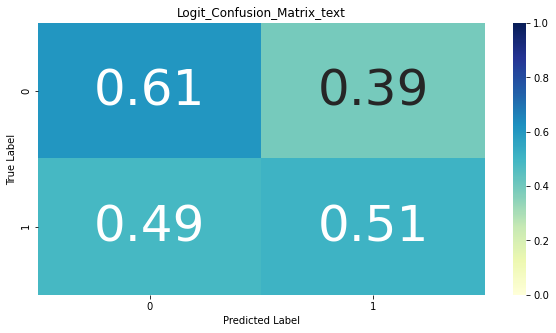

Precision:  0.565939433409313
Recall:  0.5100513573000733
AUC:  0.5595997880181645
[[6401  420]
 [  73 6742]]


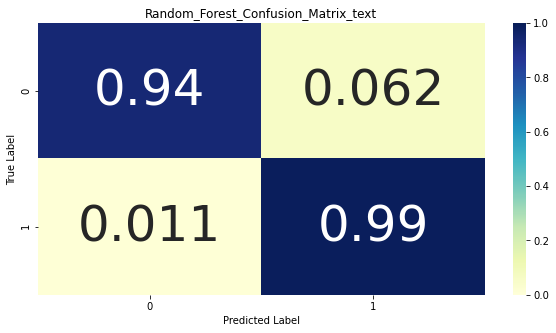

Precision:  0.9413571628036861
Recall:  0.9892883345561262
AUC:  0.9638568926848948
[[5006 1815]
 [1402 5413]]


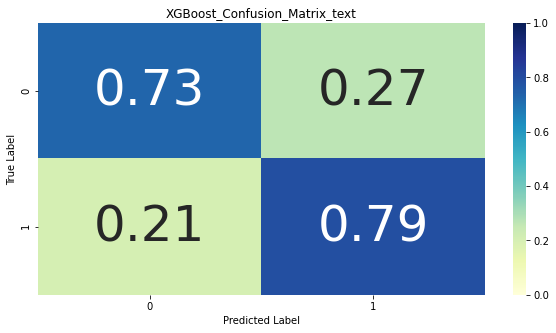

Precision:  0.7488931931377975
Recall:  0.7942773294203962
AUC:  0.7640936566468641


In [60]:
logit_cm = confusion_matrix(y_test, logit_y_pred)
logit_cm_norm = logit_cm / logit_cm.sum(axis = 1).reshape(-1,1)
plot_conf_mtx(logit_cm_norm, logit_y_pred, classes = log_reg.classes_, title = "Logit_Confusion_Matrix_text")

rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm_norm = rf_cm / rf_cm.sum(axis = 1).reshape(-1,1)
plot_conf_mtx(rf_cm_norm, rf_y_pred, classes = rf.classes_, title = "Random_Forest_Confusion_Matrix_text")

xgb_cm = confusion_matrix(y_test, xgb_y_pred)
xgb_cm_norm = xgb_cm / xgb_cm.sum(axis = 1).reshape(-1,1)
plot_conf_mtx(xgb_cm_norm, xgb_y_pred, classes = xtreme.classes_, title = "XGBoost_Confusion_Matrix_text")

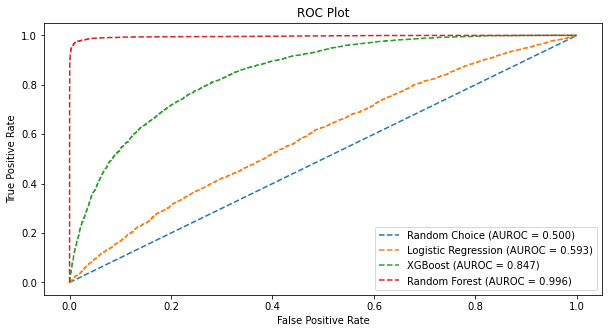

In [61]:
# Create a diagonal line for random prediction
random_probs = [0 for _ in range(len(y_test))]

random_auc = roc_auc_score(y_test, random_probs)
logit_auc = roc_auc_score(y_test, logit_probs[:,1])
rf_auc = roc_auc_score(y_test, rf_probs[:,1])
xgb_auc = roc_auc_score(y_test, xgb_probs[:,1])

# retain just the positive probs
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs[:,1])
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs[:,1])

plt.plot(random_fpr, random_tpr, linestyle = '--', label='Random Choice (AUROC = %0.3f)' % (random_auc))
plt.plot(logit_fpr, logit_tpr, linestyle = '--', label='Logistic Regression (AUROC = %0.3f)' % (logit_auc))
plt.plot(xgb_fpr, xgb_tpr, linestyle = '--', label='XGBoost (AUROC = %0.3f)' % (xgb_auc))
plt.plot(rf_fpr, rf_tpr, linestyle = '--', label='Random Forest (AUROC = %0.3f)' % (rf_auc))

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('ROC_curve_text.jpg')
plt.show()

Compared with the model that only incorporates financial information, the combining financial information and text information improved recall but worsened precision in all three models. What this suggests is that incorporating text information makes the model over-predict charge-offs, avoiding more Type 2 errors at the expense of committing more Type 1 error.s.

Random Forest shows extremely strong performance, but it is prudent to keep in mind the differences between training using borrower data in development and prediction using applicant data in production. Very likely, performance will drop with this model in a production environment.